# Mean of positive samples of scopus subjects

In [44]:
import numpy, pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#set the path to the feature_data_set.csv
PATH = 'C:\\Users\\Devesh\\Documents\\data\\extractone\\jun-10th-dump.tar.gz.part\\keys\\key.csv'
data = pd.read_csv(PATH)

In [46]:
data.head()
#data = data['Title'].applymap(str)
data['Title'] = data['Title'].astype(str)
data['Scopus'] = data['Scopus'].astype(str)


<class 'str'>


In [47]:
import re
def process_title(title): 
    #strip away numbers and parenthesis
    title = title.replace('(','').replace(')','')
    title = re.sub(r'\d+','',title)
    # strip away "part" word
    title = re.sub(r'[Pp]art','',title)
    #strip II and III and IV
    title = title.replace('II','').replace('III','').replace('IV','')
    return title

data['Title'] = data['Title'].apply(process_title) 
#drop empty titles
data = data.drop(data[data['Title'].str.strip() ==''].index)
data.head()
print(data.shape)

(26086, 5)


In [48]:
data['Scopus'] = data['Scopus'].apply(lambda Sub:Sub.lower())

# get all subjects and scopus in sets

Scopuses = set()

    
for Sco in data['Scopus'].str.split(' '):
    Scopuses |= set(Sco)

print(Scopuses)

for Sconame in Scopuses:
    
    data[Sconame] = data['Scopus'].apply(lambda Sco:1 if Sconame in Sco.split(' ') else 0)

{'medicine', 'professions', 'agricultural', 'dentistry', 'immunology', 'genetics', 'energy', 'biology', 'biological', 'accounting', 'veterinary', 'physics', 'science', 'health', 'sciences', 'chemistry', 'economics,', 'arts', 'biochemistry,', 'life', 'pharmaceutics', 'nursing', 'humanities', 'econometrics', 'toxicology', 'planetary', 'pharmacology,', 'neuroscience', 'social', 'environmental', 'astronomy', 'psychology', 'engineering', 'management', 'business,', 'computer', 'physical', 'molecular', 'mathematics', 'materials', 'decision', 'earth', 'general', 'microbiology', 'chemical', 'finance', 'and'}


In [49]:
data.head()

,Altmetric_ID,Altmetric_Score,Title,Abstract,Scopus,medicine,professions,agricultural,dentistry,immunology,...,molecular,mathematics,materials,decision,earth,general,microbiology,chemical,finance,and
0,21037493,1.00,What About the Different Shortened Versions of...,Given the mixed conclusions on the psychometri...,psychology social sciences,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41395209,3.00,Genomic organization and deduced amino acid se...,The deduced amino acid sequence of a Drosophil...,general,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,22439163,0.00,Interlamellar lipid differences between normal...,Intercellular lipids of the stratum corneum ar...,medicine health sciences,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1311989,0.00,Implant Microdesigns and Their Impact on Osseo...,Researchers are in constant search for the ide...,dentistry health sciences,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,12958677,9.08,Marked Body Shape Concerns in Female Patients ...,Concerns about body shape and weight are core ...,"biochemistry, genetics and molecular biology h...",1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [50]:
data['Title']=data['Title'].apply(lambda t: t.lower())

In [51]:
#dmean = dict(data.mean())
all_titles = ['Altmetric_Score', 'chemical', 'computer', 'life', 'microbiology',
       'genetics', 'professions', 'toxicology', 'engineering', 'energy',
       'biological', 'earth', 'accounting', 'chemistry', 'biochemistry,',
       'pharmacology,', 'general', 'agricultural', 'finance', 
       'economics,', 'biology', 'sciences', 'physical', 'decision', 'physics',
       'neuroscience', 'veterinary', 'pharmaceutics', 'planetary',
       'environmental', 'humanities', 'health', 'psychology', 'nursing' 
      , 'immunology', 'science', 'medicine', 'management',
       'social', 'business,', 'arts', 'materials', 'mathematics', 'molecular',
       'dentistry', 'astronomy', 'econometrics']
dmean={}
data['computer']=0

for title in all_titles:
    dmean[title]=data[title].mean()

for item in 
    
    
print(type(dmean))



<class 'dict'>


In [30]:
data.columns

Index(['Altmetric_ID', 'Altmetric_Score', 'Title', 'Abstract', 'Scopus',
       'medicine', 'agricultural', 'immunology', 'genetics', 'biology',
       'biological', 'science', 'health', 'sciences', 'chemistry',
       'biochemistry,', 'life', 'pharmaceutics', 'nursing', 'toxicology',
       'pharmacology,', 'neuroscience', 'social', 'environmental',
       'psychology', 'engineering', 'physical', 'molecular', 'general',
       'microbiology', 'chemical', 'and'],
      dtype='object')

In [20]:
print(dmean)

{'Altmetric_Score': 8.18918699685681, 'chemical': 0.023959211837767384, 'computer': 0.0, 'life': 0.46181860001533387, 'microbiology': 0.07172429655754044, 'genetics': 0.3143448593115081, 'professions': 0.020317411638426743, 'toxicology': 0.0551253545963352, 'engineering': 0.036648010427048995, 'energy': 0.0006516905619872728, 'biological': 0.08809323008510311, 'earth': 0.0019550716859618187, 'accounting': 0.0006516905619872728, 'chemistry': 0.061488921260446215, 'biochemistry,': 0.3143448593115081, 'pharmacology,': 0.0551253545963352, 'general': 0.026757647780418614, 'agricultural': 0.08809323008510311, 'finance': 0.0004600168672851338, 'economics,': 0.0004600168672851338, 'biology': 0.3143448593115081, 'sciences': 0.9732806869585218, 'physical': 0.12826803649467147, 'decision': 0.00015333895576171127, 'physics': 0.023422525492601397, 'neuroscience': 0.06927087326535307, 'veterinary': 0.01245879015563904, 'pharmaceutics': 0.0551253545963352, 'planetary': 0.0019550716859618187, 'environ

In [21]:
data.head()
data.columns


Index(['Altmetric_ID', 'Altmetric_Score', 'Title', 'Abstract', 'Scopus',
       'medicine', 'professions', 'agricultural', 'dentistry', 'immunology',
       'genetics', 'energy', 'biology', 'biological', 'accounting',
       'veterinary', 'physics', 'science', 'health', 'sciences', 'chemistry',
       'economics,', 'arts', 'biochemistry,', 'life', 'pharmaceutics',
       'nursing', 'humanities', 'econometrics', 'toxicology', 'planetary',
       'pharmacology,', 'neuroscience', 'social', 'environmental', 'astronomy',
       'psychology', 'engineering', 'management', 'business,', 'computer',
       'physical', 'molecular', 'mathematics', 'materials', 'decision',
       'earth', 'general', 'microbiology', 'chemical', 'finance', 'and'],
      dtype='object')

In [52]:
from collections import OrderedDict
dd = OrderedDict(sorted(dmean.items(), key=lambda x: x[1]))


In [53]:
Sco_sorted_freq = sorted(dmean.keys(),key=lambda x:dmean[x])
print(type(Sco_sorted_freq))

#dropping the least common Scopus
for S in Sco_sorted_freq[:20]:
    data = data.drop(S,axis=1)
    try:
        Scopuses.remove(S)
    except KeyError:
        print("next")


<class 'list'>


In [54]:
data.columns

Index(['Altmetric_ID', 'Altmetric_Score', 'Title', 'Abstract', 'Scopus',
       'medicine', 'agricultural', 'immunology', 'genetics', 'biology',
       'biological', 'science', 'health', 'sciences', 'chemistry',
       'biochemistry,', 'life', 'pharmaceutics', 'nursing', 'toxicology',
       'pharmacology,', 'neuroscience', 'social', 'environmental',
       'psychology', 'engineering', 'physical', 'molecular', 'general',
       'microbiology', 'chemical', 'and'],
      dtype='object')

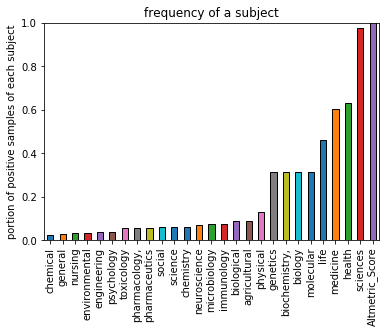

In [91]:
plt.ylim((0,1))
plt.ylabel('portion of positive samples of each subject')
plt.title("frequency of a subject")
data[Sco_sorted_freq[20:47]].mean().plot(kind='bar',edgecolor='black')
